# Comparative Analysis of SLMs Performance with Various Preprocessing Techniques in Book Review Generation

Alan, Michael, Mahsa

#Manual Evaluation of a Small Language Model (SLM) Utilizing Amazon Book Review Comments

##Purpose
The core objective of our project is to develop and assess a Small Language Model (SLM) using the Amazon book review comments dataset. Our primary goal is to create a model capable of automatically generating customer comments. A critical aspect of our research is to explore how the quality of the dataset influences the text generation capabilities of our model.

To investigate this, we have employed various preprocessing techniques on the dataset, resulting in four distinct versions, each aimed at examining a different aspect of data quality:

- **Raw Data (Original Comments Dataset)**: This dataset retains the original, unaltered comments, offering the highest flexibility.

- **Common Words Dataset**: This version includes comments specifically containing frequently appearing words.

- **POS Filtered Dataset (Nouns, Verbs, Adjectives)**: Comments in this dataset are filtered to include only nouns, verbs, and adjectives.

- **POS Filtered Dataset (Nouns, Verbs, Adjectives, Prepositions)**: This dataset represents the most structured version, with comments filtered to include nouns, verbs, adjectives, and prepositions.

##Models
Each of the four datasets has been used to develop a corresponding model, all of which are hosted on HuggingFace:

- **ChunB1/TinyReviews_raw**: Model trained on the Raw Data dataset.
- **ChunB1/TinyReviews_common**: Model trained on the Common Words dataset.
- **ChunB1/TinyReviews_adj**: Model trained on the POS Filtered dataset (Nouns, Verbs, Adjectives).
- **ChunB1/TinyReviews_adv**: Model trained on the POS Filtered dataset (Nouns, Verbs, Adjectives, Prepositions).


##Method
In addition to utilizing the GPT-Eval tool for initial evaluations, we recognize the necessity of human-based evaluation for language. Since large language models can act as 'black boxes' with limited explainability, human insight is invaluable for a comprehensive analysis.

Our manual evaluation will consist of two key components:

1. **Qualitative Analysis of Generated Comments**:

- Creativity: Assessing the uniqueness and novelty in the generated comments.
- Grammar: Evaluating the grammatical correctness and fluency.
- Consistency: Ensuring the comments are contextually and thematically consistent, supported by specific examples.

2. **Context-Based Manual Labelling**:

- We will manually label the generated comments, focusing on the model's reasoning capabilities and the logical coherence of the comments.
Through this dual approach, we aim to gain a deeper understanding of how preprocessing techniques impact the effectiveness and quality of language models in generating human-like text.



In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, Trainer, TrainingArguments, AutoConfig, pipeline
import torch
import matplotlib.pyplot as plt
import numpy as np

## Import the Saved Models

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
model_raw = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_raw')
model_common = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_common')
model_adj = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_adj')
model_adv = AutoModelForCausalLM.from_pretrained('ChunB1/TinyReviews_adv')

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/144 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/144 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/144 [00:00<?, ?B/s]

## Evaluation Tools

In [ ]:
def remove_prompt_part(prompt, output_text):
    prompt_words = prompt.split()
    output_text_words = output_text.split()[len(prompt_words):]
    return ' '.join(output_text_words)

def complete_text(model, tokenizer, prompt):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    model.config.pad_token_id = model.config.eos_token_id

    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    output = model.generate(input_ids, max_length=1000, num_beams=1, temperature=0)
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return remove_prompt_part(prompt, output_text)

def generate_outputs_for_all_models(prompt):
    output_raw = complete_text(model_raw, tokenizer, prompt)
    output_common = complete_text(model_common, tokenizer, prompt)
    output_adj = complete_text(model_adj, tokenizer, prompt)
    output_adv = complete_text(model_adv, tokenizer, prompt)

    return output_raw, output_common, output_adj, output_adv

def combine_prompt_and_extend(prompt, extended_part):
    completed_comment = prompt + " " + extended_part  # Combining prompt and the extended part
    return completed_comment

def print_model_output(model_name, prompt, output):
    print(f"Model: {model_name}")
    print(f"Extended Part: {output}")
    print(f"Completed Comment: {combine_prompt_and_extend(prompt, output)}")
    print("\n")

def print_all_model_output(prompt, output_raw, output_common, output_adj, output_adv):
  print(f"Prompt Using: {prompt}\n")
  print_model_output("Raw", prompt, output_raw)
  print_model_output("Common", prompt, output_common)
  print_model_output("Adj", prompt, output_adj)
  print_model_output("Adv", prompt, output_adv)

def plot_evaluation_metric_scores(evaluation_metrics, x_labels, scores):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width
    bar_width = 0.2
    index = np.arange(len(x_labels))

    # Plot the bars for each evaluation metric
    for i, metric in enumerate(evaluation_metrics):
        scores_list = [scores[x_label][i] for x_label in x_labels]
        ax.bar(index + (i * bar_width), scores_list, bar_width, label=metric)

    # Set x-axis labels and title
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Scores")
    ax.set_title("Evaluation Metric Scores")
    ax.set_xticks(index + bar_width * (len(evaluation_metrics) / 2))
    ax.set_xticklabels(x_labels)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

## Example Comment Analysis



> As we think GPT-Eval is a black box analysis in terms of different evaluation metrics including Grammar, Creativity, and Consistency of the comment beginning. We have taken some example comments opening here, analysis with GPT4, and finally double verified by human. We aims to see the efficiency of GPT evaluation.


We are using this prompt for evaluations:

In the following exercise, student is given a beginning of a comment about Amazon Book Review. The student needs to complete it into a complete comment. The exercise tests the student's language abilities and creativity. The symbol ^^^ marks the separator between the prescribed beginning and the student’s completion:
[Original Sentence] ^^^ [Extended Sentences]
Now, grade the student’s completion in terms of grammar, creativity, and consistency with the comment's beginning. Each metric is ranging from 0 to 10. Please provide the information as a number array only, without additional explanation or text.



### 1. Example Prompt 1

- Prompt: I didn't read the book yet but
- The Evaluation Metric Score = [Grammar, Creativity, Consistency with the Comment Opening]
- Raw: [4, 1, 3]
- Common: [9, 2, 7]
- Adj: [7, 4, 6]
- Adv: [8, 5, 8]

In [ ]:
prompt = "I didn't finish the book yet but"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: I didn't finish the book yet but

Model: Raw
Extended Part: I was disappointed. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I 

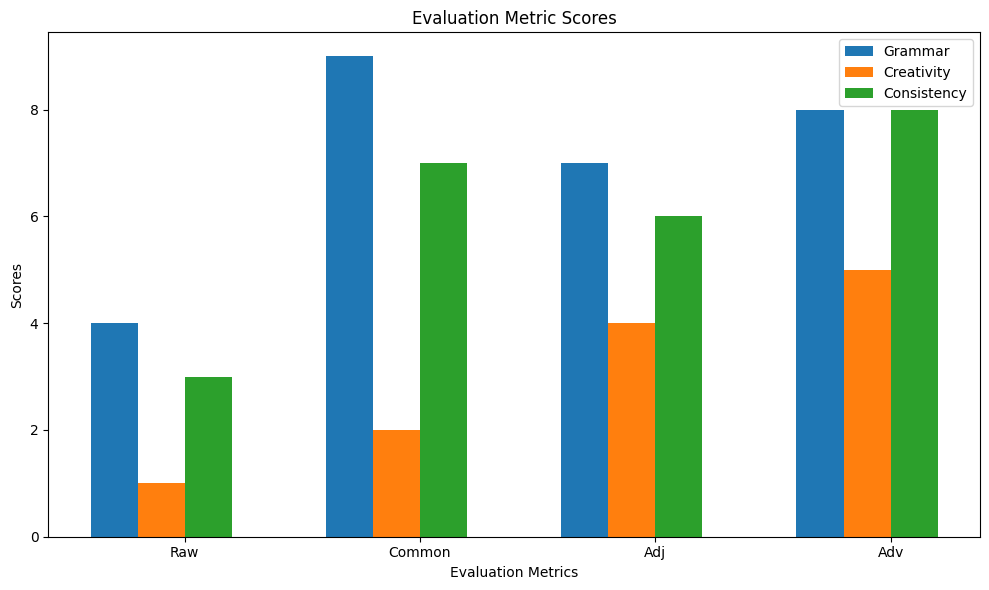

In [ ]:
# Example input data
evaluation_metrics = ["Grammar", "Creativity", "Consistency"]
x_labels = ["Raw", "Common", "Adj", "Adv"]
scores = {
    "Raw": [4, 1, 3],
    "Common": [9, 2, 7],
    "Adj": [7, 4, 6],
    "Adv": [8, 5, 8],
}

# Call the function with the example input data
plot_evaluation_metric_scores(evaluation_metrics, x_labels, scores)

### 1. Example Prompt 2

- Prompt: here are so many things in this book that
- The Evaluation Metric Score = [Grammar, Creativity, Consistency with the Comment Opening]
- Raw: [4, 1, 4]
- Common: [6, 3, 7]
- Adj: [8, 5, 8]
- Adv: [7, 6, 9]

In [ ]:
prompt = "here are so many things in this book that"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: here are so many things in this book that

Model: Raw
Extended Part: is a great book. I have read the book and I have read it. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I am a fan of the books. I have to read it. I will not wait for the next book.
Completed Comment: here are so many things in this book that is a great book. I have read the book and I have read it. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I am a fan of the books. I have to read it. I will not wait for the next book.


Model: Common
Extended Part: is a great book. I would recommend this book to anyone.
Completed Comment: here are so many things in this book that is a great book. I would recommend this book to anyone.


Model: Adj
Extended Part: I have read in a few days. I would recommend this book to anyone who loves to read.
Completed Comment: here are so many things in 

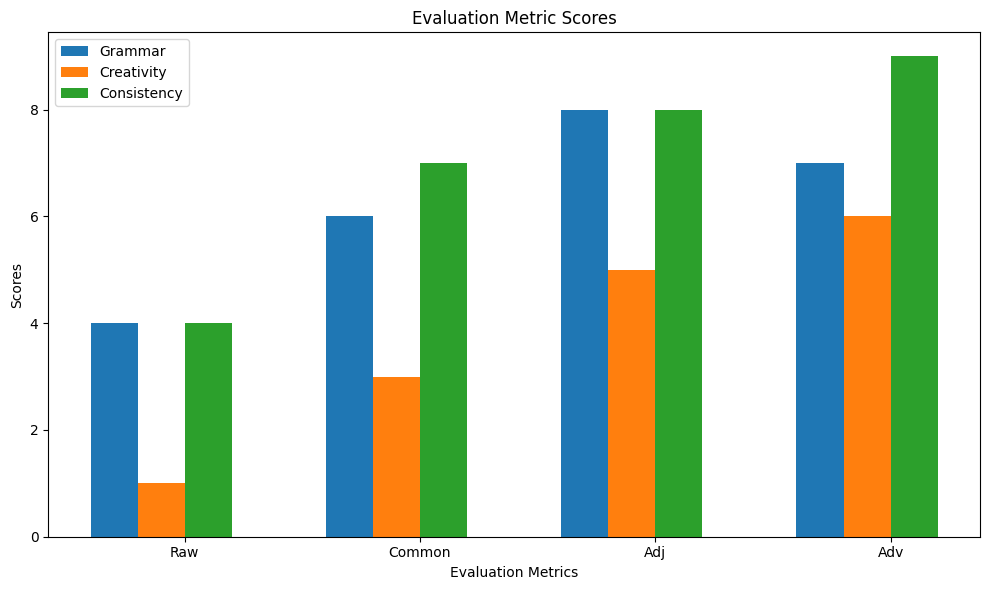

In [ ]:
# Example input data
evaluation_metrics = ["Grammar", "Creativity", "Consistency"]
x_labels = ["Raw", "Common", "Adj", "Adv"]
scores = {
    "Raw": [4, 1, 4],
    "Common": [6, 3, 7],
    "Adj": [8, 5, 8],
    "Adv": [7, 6, 9],
}

# Call the function with the example input data
plot_evaluation_metric_scores(evaluation_metrics, x_labels, scores)

## Context-Based Manual Labelling



> We have evaluated the comments in different situations of reasoning and contexts, based on our observation from our daily comments. We have prepared different type of comments opening.



> Context prompts annotated by color with respect to context-keeping capability.
- **Red = Nonsensical or not correct**
- **Yellow = Has flaws but is on the right track**
- **Green = Follows the prompt**





### A. Comment with Causal Relationship:


1. **Testing For**: The model's understanding of cause-and-effect relationships. It's important to test if the model can logically continue a thought based on a causal statement.

2. **Prompt**: The story was captivating because

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- The story was captivating because the story was very well written. I was a bit of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a bit of the characters and I was disappointed. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was surprised to see the characters. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was surprised to see the characters. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was disappointed. I was a fan of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a good read. I was a lot of the characters and I was disappointed. I was a good read. I was a lot of the next book.


- **Model: Common (Yellow = Has flaws but is on the right track)**
- The story was captivating because I was not sure that I was going to read it. I would recommend it to anyone.


- **Model: Adj (Yellow = Has flaws but is on the right track)**
- The story was captivating because it was a little slow but it was a good read.


- **Model: Adv (Green = Follows the prompt)**
- The story was captivating because I was a little more than I expected. I would recommend this book to anyone who is going to read.



> **Reason**: The Raw model's output received a red label due to its nonsensical and highly repetitive nature, failing to logically or coherently address the prompt. The Common and Adj models both earned yellow labels; they were on the right track but didn't fully capture the causal essence of the prompt. The Common model's response, while starting correctly, shifted focus to a general recommendation instead of explaining the captivating aspects of the story. Similarly, the Adj model's response was superficial, providing a basic opinion but lacking in-depth exploration of the story's captivating qualities. In contrast, the Adv model was given a green label for effectively following the prompt. It provided a coherent and relevant response that aligned well with the causal structure of the prompt, showing a good understanding and logical continuation in its reply.




In [ ]:
prompt = "The story was captivating because"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Prompt Using: The story was captivating because

Model: Raw
Extended Part: the story was very well written. I was a bit of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a bit of the characters and I was disappointed. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a lot of the characters and the characters were very interesting. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was surprised to see the characters. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was surprised to see the characters. I was a bit of the characters and I was disappointed. I was a lot of the characters and I was disappointed. I was a lot of the characters and I was disa

### B. Comment with Contrasting Relationship:

1. **Testing For**: The model's ability to handle contrast and opposition in thoughts. This tests if the model can maintain the context while introducing a contrasting idea.

2. **Prompt**: The author's style is unique, but

3. **Evaluation**:
- **Model: Raw (Yellow = Has flaws but is on the right track)**
- The author's style is unique, but it's a great read. I have read the book and I have read it.


- **Model: Common (Green = Follows the prompt)**
- The author's style is unique, but it was a good read.


- **Model: Adj (Green = Follows the prompt)**
- The author's style is unique, but I'm not sure I would like to read this book.


- **Model: Adv (Green = Follows the prompt)**
- The author's style is unique, but the story is very good.



> **Reason**:
- The Raw model's response was labeled yellow as it correctly starts with a contrasting structure but falls short in delivering a meaningful opposition. It agrees that the author's style is unique and the book is a great read, but the redundant statement about having read the book adds little value to the contrast, indicating a partial grasp of the concept.
- The Common, Adj, and Adv models all appropriately follow the contrasting prompt structure, earning them green labels. The Common model subtly introduces a contrast by acknowledging the uniqueness and still finding the book enjoyable. The Adj model provides a clear contrast by expressing uncertainty about reading the book despite acknowledging the unique style, showing a good understanding of opposition in thoughts. The Adv model successfully contrasts the unique style with the quality of the story, maintaining context and introducing a contrasting yet complementary idea. These responses demonstrate the models' capabilities in handling contrasting relationships effectively.



In [ ]:
prompt = "The author's style is unique, but"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: The author's style is unique, but

Model: Raw
Extended Part: it's a great read. I have read the book and I have read it.
Completed Comment: The author's style is unique, but it's a great read. I have read the book and I have read it.


Model: Common
Extended Part: it was a good read.
Completed Comment: The author's style is unique, but it was a good read.


Model: Adj
Extended Part: I'm not sure I would like to read this book.
Completed Comment: The author's style is unique, but I'm not sure I would like to read this book.


Model: Adv
Extended Part: the story is very good.
Completed Comment: The author's style is unique, but the story is very good.




### C. Question Sentence:


1. **Testing For**: The model's ability to generate informative and relevant responses to direct questions. This assesses the model's capacity for understanding and answering queries.

2. **Prompt**: Why is the setting important for

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- Why is the setting important for the book. I have read the book and I was disappointed. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I love the series. I was a fan of the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series.



- **Model: Common (Green = Follows the prompt)**
- Why is the setting important for the book. I have read it and I am glad I was looking for.


- **Model: Adj (Yellow = Has flaws but is on the right track)**
- Why is the setting important for the book.


- **Model: Adv (Green = Follows the prompt)**
- Why is the setting important for the book. I have read it in a long time. I am very happy with it.

> **Reason**:
- The Raw model's response is labeled red for being nonsensical. It repeats phrases irrelevantly without answering the question, showing a lack of understanding in generating informative and relevant responses to direct queries.
- The Common model receives a green label as it attempts to connect the importance of the setting with the reader's experience, suggesting a link between the setting and the reader's satisfaction. This shows an effort to follow the prompt, even if the answer could be more informative.
- The Adj model's response is yellow, indicating it's on the right track but flawed. It simply repeats the prompt without providing any additional information or insight, showing a basic acknowledgment of the question but failing to expand on it.
- The Adv model also gets a green label as it gives a personalized response connecting the setting to the reader's long-term engagement with the book. While not deeply informative, it still attempts to answer the question by tying the setting's importance to the reader's positive experience, aligning with the query's intent.







In [ ]:
prompt = "Why is the setting important for"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: Why is the setting important for

Model: Raw
Extended Part: the book. I have read the book and I was disappointed. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I love the series. I was a fan of t

### D. Comments with Descriptive Statement:


1. **Testing For**: The model's skill in building upon descriptive setups. It evaluates the model's creativity and consistency in narrative settings.

2. **Prompt**: The novel describes Hong Kong and

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- The novel describes Hong Kong and the story of the war in the war. The story is a very good read. I was a very good read.


- **Model: Common (Yellow = Has flaws but is on the right track)**
- The novel describes Hong Kong and the story is a great read.


- **Model: Adj (Green = Follows the prompt)**
- The novel describes Hong Kong and the story is a little slow but I was not sure I would like to read the book.


- **Model: Adv (Green = Follows the prompt)**
- The novel describes Hong Kong and the story line is a good read. I would recommend this book to anyone who is going to read.

> **Reason**:
- The Raw model's output is red due to its nonsensical nature. It starts with an appropriate mention of Hong Kong but quickly veers off into an unrelated and repetitive discussion about the war and reading experience. This indicates a lack of skill in building upon the descriptive setup provided in the prompt.
- The Common model's response gets a yellow label, as it partially addresses the prompt by mentioning Hong Kong but then shifts focus to a general statement about the story being a great read. It lacks depth and fails to creatively expand on the specific description of Hong Kong.
- The Adj model earns a green label for appropriately following the prompt. It continues the description of Hong Kong with a relevant comment on the story's pace and the reader's uncertainty, showing an ability to build upon the initial descriptive setup and maintain narrative consistency.
- Similarly, the Adv model is given a green label as it effectively builds on the prompt. It continues the description with a comment on the storyline and offers a recommendation, showing a good blend of narrative continuation and personal opinion, relevant to the initial setup.

In [ ]:
prompt = "The novel describes Hong Kong and"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: The novel describes Hong Kong and

Model: Raw
Extended Part: the story of the war in the war. The story is a very good read. I was a very good read.
Completed Comment: The novel describes Hong Kong and the story of the war in the war. The story is a very good read. I was a very good read.


Model: Common
Extended Part: the story is a great read.
Completed Comment: The novel describes Hong Kong and the story is a great read.


Model: Adj
Extended Part: the story is a little slow but I was not sure I would like to read the book.
Completed Comment: The novel describes Hong Kong and the story is a little slow but I was not sure I would like to read the book.


Model: Adv
Extended Part: the story line is a good read. I would recommend this book to anyone who is going to read.
Completed Comment: The novel describes Hong Kong and the story line is a good read. I would recommend this book to anyone who is going to read.




### E. Comments with Personal Opinion:

1. **Testing For**: How the model handles subjective views. It's crucial to see if the model can appropriately continue opinions and personal insights.

2. **Prompt**: In my view, the most unexpected twist was

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- In my view, the most unexpected thing was the book I was reading. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was a fan of the book. I was a fan of the book, but I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I love the series, and I was a fan of the series. I love the series, and I love the series. I love the series, and I love the series. I love the series, and I love the series. I love the series, and I love the series. I love the series. I love the series and I love the series. I love the series. I love the series. I love the series and I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series.



- **Model: Common (Yellow = Has flaws but is on the right track)**
- In my view, the most unexpected thing was a little slow.


- **Model: Adj (Green = Follows the prompt)**
- In my view, the most unexpected thing was a little slow but I didn't want to put it down.


- **Model: Adv (Green = Follows the prompt)**
- In my view, the most unexpected thing was not as good as the first book.

> **Reason**:
- The Raw model's output receives a red label due to its nonsensical and highly repetitive content. It fails to address the prompt about the unexpected twist and instead gets caught in a loop of expressing fandom and disappointment. This shows a lack of understanding in handling subjective views and personal insights.
- The Common model's response is marked yellow, indicating it's on the right track but flawed. The statement "a little slow" attempts to express a personal view but doesn't directly relate to the "unexpected twist" mentioned in the prompt. It shows some attempt at personal opinion but lacks relevance and depth in response.
- The Adj model's response earns a green label as it appropriately follows the prompt. It describes an unexpected aspect of the book (its slow pace) yet intriguing enough to keep the reader engaged. This response shows the model's capability to handle personal views and provide a relevant and engaging continuation.
- Similarly, the Adv model is given a green label for effectively addressing the prompt. It offers a personal opinion on the unexpected aspect of the book, comparing it to a previous installment. This shows the model's ability to engage with the prompt in a subjective yet contextually relevant manner.

In [ ]:
prompt = "In my view, the most unexpected thing was"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: In my view, the most unexpected thing was

Model: Raw
Extended Part: the book I was reading. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was a fan of the book. I was a fan of the book, but I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series, and I was a fan of the series. I love the series, and I was a fan of the serie

### F. Comments with Hypothetical Scenario:

1. **Testing For**: The model's creative thinking in hypothetical situations. This tests the model’s ability to speculate and imagine alternative scenarios.

2. **Prompt**: Imagine if the story was set in space, it would

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- Imagine if the story was set in space, it would be a good read. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I love the series, and I was a fan of the series. I love the series. I love the series, and I love the series. I love the series. I love the series. I love the series. I love the series and I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series.



- **Model: Common (Green = Follows the prompt)**
- Imagine if the story was set in space, it would be a good read.


- **Model: Adj (Green = Follows the prompt)**
- Imagine if the story was set in space, it would be a good book.


- **Model: Adv (Green = Follows the prompt)**
- Imagine if the story was set in space, it would be a good read.

> **Reason**:
- The Raw model's output is labeled red for being nonsensical and repetitive. It fails to engage creatively with the hypothetical scenario of the story being set in space. Instead, it gets stuck in a loop of being a fan and feeling disappointed, showing a lack of speculative and imaginative capability.
- The Common, Adj, and Adv models all receive green labels for appropriately following the prompt. They each engage with the hypothetical scenario by speculating that if the story was set in space, it would be a good read or a good book. This demonstrates their ability to engage with the hypothetical setup and provide a simple yet relevant speculative continuation. While the responses are not highly detailed or creative, they correctly follow the prompt's direction and imagine an alternative setting, aligning with the intended speculative nature of the prompt.

In [ ]:
prompt = "Imagine if the story was set in space, it would"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: Imagine if the story was set in space, it would

Model: Raw
Extended Part: be a good read. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a lot of the characters. I was a lot of the characters, and I was disappointed. I was a fan of the book, but I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series. I was a fan of the series. I was a fan of the series, and I was a fan of the series

### G. Comments with Emotional Response:

1. **Testing For**: The model's capability to generate empathetic and emotionally charged continuations. It assesses the emotional intelligence of the model.

2. **Prompt**: The character's journey made me feel

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- The character's journey made me feel like the story. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series.



- **Model: Common (Green = Follows the prompt)**
- The character's journey made me feel like this book. I have read it in a long time. I would recommend it to anyone.



- **Model: Adj (Green = Follows the prompt)**
- The character's journey made me feel like it was a little slow but I was not sure I would like to read it.



- **Model: Adv (Green = Follows the prompt)**
- The character's journey made me feel like the book. I am very happy with the book. I am looking forward to reading the next one.

> **Reason**:
- The Raw model's response is labeled red as it fails to provide an emotionally charged continuation relevant to the prompt. Instead, it repeats phrases about being a fan of the book and series, demonstrating a lack of emotional intelligence and inability to generate empathetic responses that align with the character's journey described in the prompt.
- The Common, Adj, and Adv models all receive green labels for appropriately addressing the prompt. The Common model's response links the character's journey to the reader's positive experience with the book, suggesting an emotional connection and satisfaction, which aligns with the prompt's intent. The Adj model adds a nuanced perspective by mentioning the story's pace and the reader's initial uncertainty, indicating a more complex emotional response. The Adv model's response is also effective, expressing happiness with the book and anticipation for the next installment, showing an understanding of how the character's journey can influence the reader's emotional state and expectations. These responses demonstrate each model's capability to generate relevant and emotionally resonant continuations in line with the character's journey.

In [ ]:
prompt = "The character's journey made me feel"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: The character's journey made me feel

Model: Raw
Extended Part: like the story. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the book. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I was a fan of the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series. I love the series

### H. Comments with Comparative Statement:

1. **Testing For**: The model's skill in making comparisons and distinguishing unique traits. This evaluates the model’s ability to recognize and articulate uniqueness.

2. **Prompt**: Unlike traditional novels, this book features

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- Unlike traditional novels, this book features a great story of a young woman who has a very well-old girl, and a woman who is a man who is a man who is a man who is a man. He is a very good job of the man who is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man who is a man. He is a man. He is a man who is a man. He is a man. I think he is a book. He is a book. I think that is a book. I have read it is a good. I have to read. I can be read it. read. I will read it. I will read it. I recommend it. I will read it. I recommend it. I recommend it.



- **Model: Common (Red = Nonsensical or not correct)**
- Unlike traditional novels, this book features


- **Model: Adj (Yellow = Has flaws but is on the right track)**
- Unlike traditional novels, this book features are great.



- **Model: Adv (Green = Follows the prompt)**
- Unlike traditional novels, this book features is a great book. I have read it in a day. I am very happy with it.

> **Reason**:
- The Raw model's response is labeled red for being nonsensical and extremely repetitive. It fails to articulate any unique traits of the book compared to traditional novels. Instead, it gets caught in an incomprehensible loop about a man, showing a complete lack of skill in making meaningful comparisons or distinguishing unique traits.
- The Common model also receives a red label as it does not provide any continuation beyond the prompt. This indicates a failure to engage with the task of making a comparative statement, leaving the unique features of the book unaddressed.
- The Adj model's response is marked yellow, showing it's on the right track but flawed. The statement "features are great" attempts to make a comparative distinction but lacks specificity and depth. It acknowledges the book's positive aspects but doesn't clearly articulate how it differs from traditional novels.
- The Adv model is given a green label for effectively following the prompt. It not only distinguishes the book from traditional novels by labeling it as "great" but also adds personal experience and satisfaction, suggesting a quick and enjoyable reading experience. This response demonstrates the model's ability to recognize and articulate the uniqueness of the book in comparison to traditional novels.

In [ ]:
prompt = "Unlike traditional novels, this book features"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: Unlike traditional novels, this book features

Model: Raw
Extended Part: a great story of a young woman who has a very well-old girl, and a woman who is a man who is a man who is a man who is a man. He is a very good job of the man who is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man who is a man. He is a man who is a man. He is a man who is a man who is a man. He is a man who is a man 

### I. Comments with Factual Statement:

1. **Testing For**: The model's effectiveness in handling and continuing factual information. It's important to assess how the model deals with specific historical or contextual details.

2. **Prompt**: This is an old book

3. **Evaluation**:
- **Model: Raw (Red = Nonsensical or not correct)**
- This is an old book that I have read. I have read it and I have read it. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I will not wait to read it.



- **Model: Common (Yellow = Has flaws but is on the right track)**
- This is an old book It is a great read. I would recommend it to anyone who loves to read.



- **Model: Adj (Yellow = Has flaws but is on the right track)**
- This is an old book I love it. It is a great book.



- **Model: Adv (Green = Follows the prompt)**
- This is an old book that I have read in a long time. I am very happy with this book.

> **Reason**:
- The Raw model's response is labeled red as it fails to properly engage with the factual statement about the book being old. Instead, it repetitively focuses on the act of reading the book without providing any specific historical or contextual details related to the book's age. This lack of relevant continuation shows a failure to handle factual information effectively.
- The Common and Adj models both receive yellow labels, indicating they are on the right track but flawed. Both responses acknowledge the book's age but then shift to general praise and recommendations. While they maintain a positive tone, they miss the opportunity to expand on the factual aspect of the book being old, such as its historical significance, impact, or content that reflects its age.
- The Adv model is given a green label as it effectively follows the prompt by acknowledging the book's age and adding a personal reflection on the reading experience. It continues the factual statement with a sentiment of satisfaction, suggesting a long-lasting appeal of the book. This shows an ability to handle factual information while adding a personal touch, making the response relevant and contextually appropriate.

In [ ]:
prompt = "This is an old book"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: This is an old book

Model: Raw
Extended Part: that I have read. I have read it and I have read it. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I will not wait to read it.
Completed Comment: This is an old book that I have read. I have read it and I have read it. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I have read it again. I will not wait to read it.


Model: Common
Extended Part: It is a great read. I would recommend it to anyone who loves to read.
Completed Comment: This is an old book It is a great read. I would recommend it to anyone who loves to read.


Model: Adj
Extended Part: I love it. It is a great book.
Completed Comment: This is an old book I love it. It is a great book.


Model: Adv
Extended Part: that I have read in

### J. Comments with Future Prediction:

1. **Testing For**: The model's ability to make logical predictions based on previous content. This tests the model's understanding of narrative progression and foreshadowing.

2. **Prompt**: The author is likely to explore

3. **Evaluation**:
- **Model: Raw (Green = Follows the prompt)**
- The author is likely to explore the story of the world of the world. The story is a good read. I have read the book and I was disappointed.



- **Model: Common (Yellow = Has flaws but is on the right track)**
- The author is likely to explore the book.




- **Model: Adj (Green = Follows the prompt)**
- The author is likely to explore the book. I have read it in one day. I'm not sure I would recommend it.



- **Model: Adv (Green = Follows the prompt)**
- The author is likely to explore the book. I have read it in a day. I am very happy with it.


> **Reason**:
- The Raw model's response is given a green label as it attempts to follow the prompt by suggesting the author will explore "the story of the world." While the continuation is somewhat general and ends with a shift to the reader's experience, it still aligns with the task of predicting the author's future exploration in narrative themes.
- The Common model's output is labeled yellow, indicating it's on the right track but flawed. The response is overly vague and lacks specificity in predicting what the author is likely to explore in future works. It acknowledges the prompt but fails to provide a meaningful or detailed prediction.
- Both the Adj and Adv models receive green labels for effectively following the prompt. They predict the author's future exploration of the book's themes and add personal reading experiences. While these responses lean towards the reader's perspective, they still align with the task of making logical predictions about the author's future work, showing an understanding of narrative progression and potential foreshadowing.

In [ ]:
prompt = "The author is likely to explore"
output_raw, output_common, output_adj, output_adv = generate_outputs_for_all_models(prompt)
print_all_model_output(
    prompt=prompt,
    output_raw=output_raw,
    output_common=output_common,
    output_adj=output_adj,
    output_adv=output_adv
)

Prompt Using: The author is likely to explore

Model: Raw
Extended Part: the story of the world of the world. The story is a good read. I have read the book and I was disappointed.
Completed Comment: The author is likely to explore the story of the world of the world. The story is a good read. I have read the book and I was disappointed.


Model: Common
Extended Part: the book.
Completed Comment: The author is likely to explore the book.


Model: Adj
Extended Part: the book. I have read it in one day. I'm not sure I would recommend it.
Completed Comment: The author is likely to explore the book. I have read it in one day. I'm not sure I would recommend it.


Model: Adv
Extended Part: the book. I have read it in a day. I am very happy with it.
Completed Comment: The author is likely to explore the book. I have read it in a day. I am very happy with it.


